In [2]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.79
Loading CCF brain structure data...
Loading time: 0.00


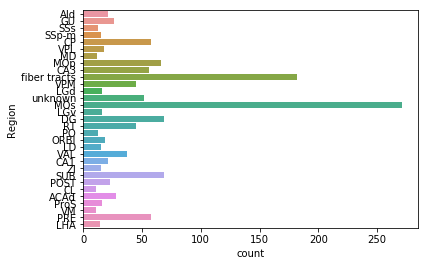

In [8]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

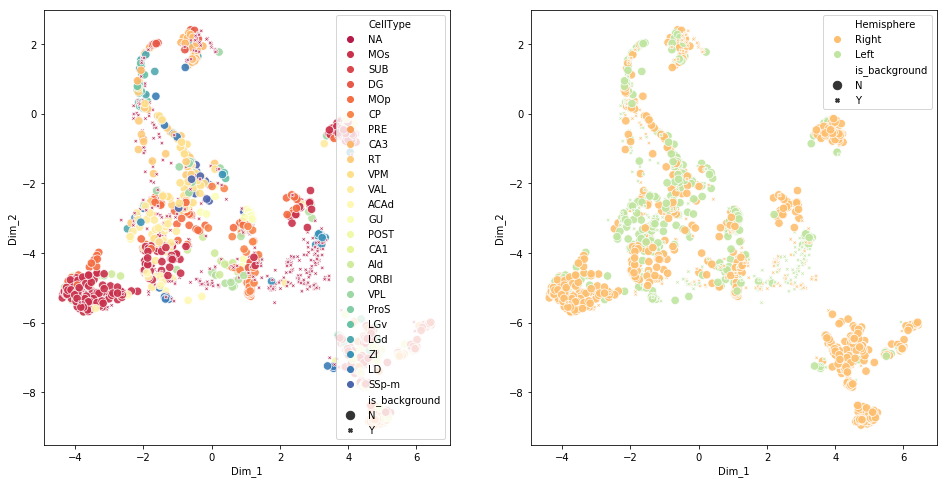

In [9]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

### Speed of parallel
* for an array testA = nmt.annotation.array[55:90,120:167,179:231].copy()
    * There are 85540 points inside
    * Takes 29.143057346343994 second to run the code.
* For the original array
    * There are 77045760 points inside
    * It may take about 7.25 hours to store all the point. We will try that this evening.

In [10]:
x_block = [range(nmt.annotation.array.shape[0])[i:i + 30] for i in range(0, nmt.annotation.array.shape[0], 30)]
y_block = [range(nmt.annotation.array.shape[1])[i:i + 30] for i in range(0, nmt.annotation.array.shape[1], 30)]
z_block = [range(nmt.annotation.array.shape[2])[i:i + 30] for i in range(0, nmt.annotation.array.shape[2], 30)]

### 6-nearest neighbor

In [5]:
import multiprocessing
import time
def Contour_block6(Temp_arr,x_lower,x_upper,y_lower,y_upper,z_lower,z_upper):#,x_s,y_s,z_s):
    mask_Temp = np.zeros((Temp_arr.shape)) 
    mask_Temp[x_lower:x_upper,y_lower:y_upper,z_lower:z_upper]=1
    
    co_1,co_2,co_3 = np.where(np.multiply(mask_Temp,Temp_arr)!=0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1yz = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]  # +1,0,0
        x2yz = Temp_arr[max(0,x_in-1),y_in,z_in]                    # -1,0,0
        xy1z = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in]  # 0,+1,0
        xy2z = Temp_arr[x_in,max(0,y_in-1),z_in]                    # 0,-1,0
        xyz1 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]  # 0,0,+1
        xyz2 = Temp_arr[x_in,y_in,max(0,z_in-1)]                    # 0,0,-1
        if not all(v == centerV for v in [x1yz,x2yz,xy1z,xy2z,xyz1,xyz2]):
            #print(str([centerV,x1yz,x2yz,xy1z,xy2z,xyz1,xyz2]))
            block_list.append([x_in,y_in,z_in])
    return (block_list)



start = time.perf_counter ()
start=time.time()


result_list=[]   
temp_array = nmt.annotation.array.copy()
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            x_l = iter_X[0]
            x_u = iter_X[-1]+1
            y_l = iter_Y[0]
            y_u = iter_Y[-1]+1
            z_l = iter_Z[0]
            z_u = iter_Z[-1]+1

            result_list.append(Contour_block6(temp_array,x_l,x_u,y_l,y_u,z_l,z_u))#,iter_X[0],iter_Y[0],iter_Z[0]))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))



X range: 0:30; Y range: 0:30; Z range: 0:30
X range: 0:30; Y range: 0:30; Z range: 30:60
X range: 0:30; Y range: 0:30; Z range: 60:90
X range: 0:30; Y range: 0:30; Z range: 90:120
X range: 0:30; Y range: 0:30; Z range: 120:150
X range: 0:30; Y range: 0:30; Z range: 150:180
X range: 0:30; Y range: 0:30; Z range: 180:210
X range: 0:30; Y range: 0:30; Z range: 210:240
X range: 0:30; Y range: 0:30; Z range: 240:270
X range: 0:30; Y range: 0:30; Z range: 270:300
X range: 0:30; Y range: 0:30; Z range: 300:330
X range: 0:30; Y range: 0:30; Z range: 330:360
X range: 0:30; Y range: 0:30; Z range: 360:390
X range: 0:30; Y range: 0:30; Z range: 390:420
X range: 0:30; Y range: 0:30; Z range: 420:450
X range: 0:30; Y range: 0:30; Z range: 450:456
X range: 0:30; Y range: 30:60; Z range: 0:30
X range: 0:30; Y range: 30:60; Z range: 30:60
X range: 0:30; Y range: 30:60; Z range: 60:90
X range: 0:30; Y range: 30:60; Z range: 90:120
X range: 0:30; Y range: 30:60; Z range: 120:150
X range: 0:30; Y range: 

X range: 0:30; Y range: 300:320; Z range: 270:300
X range: 0:30; Y range: 300:320; Z range: 300:330
X range: 0:30; Y range: 300:320; Z range: 330:360
X range: 0:30; Y range: 300:320; Z range: 360:390
X range: 0:30; Y range: 300:320; Z range: 390:420
X range: 0:30; Y range: 300:320; Z range: 420:450
X range: 0:30; Y range: 300:320; Z range: 450:456
X range: 30:60; Y range: 0:30; Z range: 0:30
X range: 30:60; Y range: 0:30; Z range: 30:60
X range: 30:60; Y range: 0:30; Z range: 60:90
X range: 30:60; Y range: 0:30; Z range: 90:120
X range: 30:60; Y range: 0:30; Z range: 120:150
X range: 30:60; Y range: 0:30; Z range: 150:180
X range: 30:60; Y range: 0:30; Z range: 180:210
X range: 30:60; Y range: 0:30; Z range: 210:240
X range: 30:60; Y range: 0:30; Z range: 240:270
X range: 30:60; Y range: 0:30; Z range: 270:300
X range: 30:60; Y range: 0:30; Z range: 300:330
X range: 30:60; Y range: 0:30; Z range: 330:360
X range: 30:60; Y range: 0:30; Z range: 360:390
X range: 30:60; Y range: 0:30; Z r

X range: 30:60; Y range: 270:300; Z range: 420:450
X range: 30:60; Y range: 270:300; Z range: 450:456
X range: 30:60; Y range: 300:320; Z range: 0:30
X range: 30:60; Y range: 300:320; Z range: 30:60
X range: 30:60; Y range: 300:320; Z range: 60:90
X range: 30:60; Y range: 300:320; Z range: 90:120
X range: 30:60; Y range: 300:320; Z range: 120:150
X range: 30:60; Y range: 300:320; Z range: 150:180
X range: 30:60; Y range: 300:320; Z range: 180:210
X range: 30:60; Y range: 300:320; Z range: 210:240
X range: 30:60; Y range: 300:320; Z range: 240:270
X range: 30:60; Y range: 300:320; Z range: 270:300
X range: 30:60; Y range: 300:320; Z range: 300:330
X range: 30:60; Y range: 300:320; Z range: 330:360
X range: 30:60; Y range: 300:320; Z range: 360:390
X range: 30:60; Y range: 300:320; Z range: 390:420
X range: 30:60; Y range: 300:320; Z range: 420:450
X range: 30:60; Y range: 300:320; Z range: 450:456
X range: 60:90; Y range: 0:30; Z range: 0:30
X range: 60:90; Y range: 0:30; Z range: 30:60

X range: 60:90; Y range: 270:300; Z range: 90:120
X range: 60:90; Y range: 270:300; Z range: 120:150
X range: 60:90; Y range: 270:300; Z range: 150:180
X range: 60:90; Y range: 270:300; Z range: 180:210
X range: 60:90; Y range: 270:300; Z range: 210:240
X range: 60:90; Y range: 270:300; Z range: 240:270
X range: 60:90; Y range: 270:300; Z range: 270:300
X range: 60:90; Y range: 270:300; Z range: 300:330
X range: 60:90; Y range: 270:300; Z range: 330:360
X range: 60:90; Y range: 270:300; Z range: 360:390
X range: 60:90; Y range: 270:300; Z range: 390:420
X range: 60:90; Y range: 270:300; Z range: 420:450
X range: 60:90; Y range: 270:300; Z range: 450:456
X range: 60:90; Y range: 300:320; Z range: 0:30
X range: 60:90; Y range: 300:320; Z range: 30:60
X range: 60:90; Y range: 300:320; Z range: 60:90
X range: 60:90; Y range: 300:320; Z range: 90:120
X range: 60:90; Y range: 300:320; Z range: 120:150
X range: 60:90; Y range: 300:320; Z range: 150:180
X range: 60:90; Y range: 300:320; Z rang

X range: 90:120; Y range: 240:270; Z range: 180:210
X range: 90:120; Y range: 240:270; Z range: 210:240
X range: 90:120; Y range: 240:270; Z range: 240:270
X range: 90:120; Y range: 240:270; Z range: 270:300
X range: 90:120; Y range: 240:270; Z range: 300:330
X range: 90:120; Y range: 240:270; Z range: 330:360
X range: 90:120; Y range: 240:270; Z range: 360:390
X range: 90:120; Y range: 240:270; Z range: 390:420
X range: 90:120; Y range: 240:270; Z range: 420:450
X range: 90:120; Y range: 240:270; Z range: 450:456
X range: 90:120; Y range: 270:300; Z range: 0:30
X range: 90:120; Y range: 270:300; Z range: 30:60
X range: 90:120; Y range: 270:300; Z range: 60:90
X range: 90:120; Y range: 270:300; Z range: 90:120
X range: 90:120; Y range: 270:300; Z range: 120:150
X range: 90:120; Y range: 270:300; Z range: 150:180
X range: 90:120; Y range: 270:300; Z range: 180:210
X range: 90:120; Y range: 270:300; Z range: 210:240
X range: 90:120; Y range: 270:300; Z range: 240:270
X range: 90:120; Y r

X range: 120:150; Y range: 210:240; Z range: 180:210
X range: 120:150; Y range: 210:240; Z range: 210:240
X range: 120:150; Y range: 210:240; Z range: 240:270
X range: 120:150; Y range: 210:240; Z range: 270:300
X range: 120:150; Y range: 210:240; Z range: 300:330
X range: 120:150; Y range: 210:240; Z range: 330:360
X range: 120:150; Y range: 210:240; Z range: 360:390
X range: 120:150; Y range: 210:240; Z range: 390:420
X range: 120:150; Y range: 210:240; Z range: 420:450
X range: 120:150; Y range: 210:240; Z range: 450:456
X range: 120:150; Y range: 240:270; Z range: 0:30
X range: 120:150; Y range: 240:270; Z range: 30:60
X range: 120:150; Y range: 240:270; Z range: 60:90
X range: 120:150; Y range: 240:270; Z range: 90:120
X range: 120:150; Y range: 240:270; Z range: 120:150
X range: 120:150; Y range: 240:270; Z range: 150:180
X range: 120:150; Y range: 240:270; Z range: 180:210
X range: 120:150; Y range: 240:270; Z range: 210:240
X range: 120:150; Y range: 240:270; Z range: 240:270
X

X range: 150:180; Y range: 180:210; Z range: 150:180
X range: 150:180; Y range: 180:210; Z range: 180:210
X range: 150:180; Y range: 180:210; Z range: 210:240
X range: 150:180; Y range: 180:210; Z range: 240:270
X range: 150:180; Y range: 180:210; Z range: 270:300
X range: 150:180; Y range: 180:210; Z range: 300:330
X range: 150:180; Y range: 180:210; Z range: 330:360
X range: 150:180; Y range: 180:210; Z range: 360:390
X range: 150:180; Y range: 180:210; Z range: 390:420
X range: 150:180; Y range: 180:210; Z range: 420:450
X range: 150:180; Y range: 180:210; Z range: 450:456
X range: 150:180; Y range: 210:240; Z range: 0:30
X range: 150:180; Y range: 210:240; Z range: 30:60
X range: 150:180; Y range: 210:240; Z range: 60:90
X range: 150:180; Y range: 210:240; Z range: 90:120
X range: 150:180; Y range: 210:240; Z range: 120:150
X range: 150:180; Y range: 210:240; Z range: 150:180
X range: 150:180; Y range: 210:240; Z range: 180:210
X range: 150:180; Y range: 210:240; Z range: 210:240
X

X range: 180:210; Y range: 150:180; Z range: 120:150
X range: 180:210; Y range: 150:180; Z range: 150:180
X range: 180:210; Y range: 150:180; Z range: 180:210
X range: 180:210; Y range: 150:180; Z range: 210:240
X range: 180:210; Y range: 150:180; Z range: 240:270
X range: 180:210; Y range: 150:180; Z range: 270:300
X range: 180:210; Y range: 150:180; Z range: 300:330
X range: 180:210; Y range: 150:180; Z range: 330:360
X range: 180:210; Y range: 150:180; Z range: 360:390
X range: 180:210; Y range: 150:180; Z range: 390:420
X range: 180:210; Y range: 150:180; Z range: 420:450
X range: 180:210; Y range: 150:180; Z range: 450:456
X range: 180:210; Y range: 180:210; Z range: 0:30
X range: 180:210; Y range: 180:210; Z range: 30:60
X range: 180:210; Y range: 180:210; Z range: 60:90
X range: 180:210; Y range: 180:210; Z range: 90:120
X range: 180:210; Y range: 180:210; Z range: 120:150
X range: 180:210; Y range: 180:210; Z range: 150:180
X range: 180:210; Y range: 180:210; Z range: 180:210
X

X range: 210:240; Y range: 120:150; Z range: 90:120
X range: 210:240; Y range: 120:150; Z range: 120:150
X range: 210:240; Y range: 120:150; Z range: 150:180
X range: 210:240; Y range: 120:150; Z range: 180:210
X range: 210:240; Y range: 120:150; Z range: 210:240
X range: 210:240; Y range: 120:150; Z range: 240:270
X range: 210:240; Y range: 120:150; Z range: 270:300
X range: 210:240; Y range: 120:150; Z range: 300:330
X range: 210:240; Y range: 120:150; Z range: 330:360
X range: 210:240; Y range: 120:150; Z range: 360:390
X range: 210:240; Y range: 120:150; Z range: 390:420
X range: 210:240; Y range: 120:150; Z range: 420:450
X range: 210:240; Y range: 120:150; Z range: 450:456
X range: 210:240; Y range: 150:180; Z range: 0:30
X range: 210:240; Y range: 150:180; Z range: 30:60
X range: 210:240; Y range: 150:180; Z range: 60:90
X range: 210:240; Y range: 150:180; Z range: 90:120
X range: 210:240; Y range: 150:180; Z range: 120:150
X range: 210:240; Y range: 150:180; Z range: 150:180
X 

X range: 240:270; Y range: 90:120; Z range: 60:90
X range: 240:270; Y range: 90:120; Z range: 90:120
X range: 240:270; Y range: 90:120; Z range: 120:150
X range: 240:270; Y range: 90:120; Z range: 150:180
X range: 240:270; Y range: 90:120; Z range: 180:210
X range: 240:270; Y range: 90:120; Z range: 210:240
X range: 240:270; Y range: 90:120; Z range: 240:270
X range: 240:270; Y range: 90:120; Z range: 270:300
X range: 240:270; Y range: 90:120; Z range: 300:330
X range: 240:270; Y range: 90:120; Z range: 330:360
X range: 240:270; Y range: 90:120; Z range: 360:390
X range: 240:270; Y range: 90:120; Z range: 390:420
X range: 240:270; Y range: 90:120; Z range: 420:450
X range: 240:270; Y range: 90:120; Z range: 450:456
X range: 240:270; Y range: 120:150; Z range: 0:30
X range: 240:270; Y range: 120:150; Z range: 30:60
X range: 240:270; Y range: 120:150; Z range: 60:90
X range: 240:270; Y range: 120:150; Z range: 90:120
X range: 240:270; Y range: 120:150; Z range: 120:150
X range: 240:270; 

X range: 270:300; Y range: 60:90; Z range: 0:30
X range: 270:300; Y range: 60:90; Z range: 30:60
X range: 270:300; Y range: 60:90; Z range: 60:90
X range: 270:300; Y range: 60:90; Z range: 90:120
X range: 270:300; Y range: 60:90; Z range: 120:150
X range: 270:300; Y range: 60:90; Z range: 150:180
X range: 270:300; Y range: 60:90; Z range: 180:210
X range: 270:300; Y range: 60:90; Z range: 210:240
X range: 270:300; Y range: 60:90; Z range: 240:270
X range: 270:300; Y range: 60:90; Z range: 270:300
X range: 270:300; Y range: 60:90; Z range: 300:330
X range: 270:300; Y range: 60:90; Z range: 330:360
X range: 270:300; Y range: 60:90; Z range: 360:390
X range: 270:300; Y range: 60:90; Z range: 390:420
X range: 270:300; Y range: 60:90; Z range: 420:450
X range: 270:300; Y range: 60:90; Z range: 450:456
X range: 270:300; Y range: 90:120; Z range: 0:30
X range: 270:300; Y range: 90:120; Z range: 30:60
X range: 270:300; Y range: 90:120; Z range: 60:90
X range: 270:300; Y range: 90:120; Z range:

X range: 300:330; Y range: 0:30; Z range: 420:450
X range: 300:330; Y range: 0:30; Z range: 450:456
X range: 300:330; Y range: 30:60; Z range: 0:30
X range: 300:330; Y range: 30:60; Z range: 30:60
X range: 300:330; Y range: 30:60; Z range: 60:90
X range: 300:330; Y range: 30:60; Z range: 90:120
X range: 300:330; Y range: 30:60; Z range: 120:150
X range: 300:330; Y range: 30:60; Z range: 150:180
X range: 300:330; Y range: 30:60; Z range: 180:210
X range: 300:330; Y range: 30:60; Z range: 210:240
X range: 300:330; Y range: 30:60; Z range: 240:270
X range: 300:330; Y range: 30:60; Z range: 270:300
X range: 300:330; Y range: 30:60; Z range: 300:330
X range: 300:330; Y range: 30:60; Z range: 330:360
X range: 300:330; Y range: 30:60; Z range: 360:390
X range: 300:330; Y range: 30:60; Z range: 390:420
X range: 300:330; Y range: 30:60; Z range: 420:450
X range: 300:330; Y range: 30:60; Z range: 450:456
X range: 300:330; Y range: 60:90; Z range: 0:30
X range: 300:330; Y range: 60:90; Z range: 3

X range: 300:330; Y range: 300:320; Z range: 360:390
X range: 300:330; Y range: 300:320; Z range: 390:420
X range: 300:330; Y range: 300:320; Z range: 420:450
X range: 300:330; Y range: 300:320; Z range: 450:456
X range: 330:360; Y range: 0:30; Z range: 0:30
X range: 330:360; Y range: 0:30; Z range: 30:60
X range: 330:360; Y range: 0:30; Z range: 60:90
X range: 330:360; Y range: 0:30; Z range: 90:120
X range: 330:360; Y range: 0:30; Z range: 120:150
X range: 330:360; Y range: 0:30; Z range: 150:180
X range: 330:360; Y range: 0:30; Z range: 180:210
X range: 330:360; Y range: 0:30; Z range: 210:240
X range: 330:360; Y range: 0:30; Z range: 240:270
X range: 330:360; Y range: 0:30; Z range: 270:300
X range: 330:360; Y range: 0:30; Z range: 300:330
X range: 330:360; Y range: 0:30; Z range: 330:360
X range: 330:360; Y range: 0:30; Z range: 360:390
X range: 330:360; Y range: 0:30; Z range: 390:420
X range: 330:360; Y range: 0:30; Z range: 420:450
X range: 330:360; Y range: 0:30; Z range: 450:

X range: 330:360; Y range: 270:300; Z range: 330:360
X range: 330:360; Y range: 270:300; Z range: 360:390
X range: 330:360; Y range: 270:300; Z range: 390:420
X range: 330:360; Y range: 270:300; Z range: 420:450
X range: 330:360; Y range: 270:300; Z range: 450:456
X range: 330:360; Y range: 300:320; Z range: 0:30
X range: 330:360; Y range: 300:320; Z range: 30:60
X range: 330:360; Y range: 300:320; Z range: 60:90
X range: 330:360; Y range: 300:320; Z range: 90:120
X range: 330:360; Y range: 300:320; Z range: 120:150
X range: 330:360; Y range: 300:320; Z range: 150:180
X range: 330:360; Y range: 300:320; Z range: 180:210
X range: 330:360; Y range: 300:320; Z range: 210:240
X range: 330:360; Y range: 300:320; Z range: 240:270
X range: 330:360; Y range: 300:320; Z range: 270:300
X range: 330:360; Y range: 300:320; Z range: 300:330
X range: 330:360; Y range: 300:320; Z range: 330:360
X range: 330:360; Y range: 300:320; Z range: 360:390
X range: 330:360; Y range: 300:320; Z range: 390:420
X

X range: 360:390; Y range: 240:270; Z range: 300:330
X range: 360:390; Y range: 240:270; Z range: 330:360
X range: 360:390; Y range: 240:270; Z range: 360:390
X range: 360:390; Y range: 240:270; Z range: 390:420
X range: 360:390; Y range: 240:270; Z range: 420:450
X range: 360:390; Y range: 240:270; Z range: 450:456
X range: 360:390; Y range: 270:300; Z range: 0:30
X range: 360:390; Y range: 270:300; Z range: 30:60
X range: 360:390; Y range: 270:300; Z range: 60:90
X range: 360:390; Y range: 270:300; Z range: 90:120
X range: 360:390; Y range: 270:300; Z range: 120:150
X range: 360:390; Y range: 270:300; Z range: 150:180
X range: 360:390; Y range: 270:300; Z range: 180:210
X range: 360:390; Y range: 270:300; Z range: 210:240
X range: 360:390; Y range: 270:300; Z range: 240:270
X range: 360:390; Y range: 270:300; Z range: 270:300
X range: 360:390; Y range: 270:300; Z range: 300:330
X range: 360:390; Y range: 270:300; Z range: 330:360
X range: 360:390; Y range: 270:300; Z range: 360:390
X

X range: 390:420; Y range: 210:240; Z range: 270:300
X range: 390:420; Y range: 210:240; Z range: 300:330
X range: 390:420; Y range: 210:240; Z range: 330:360
X range: 390:420; Y range: 210:240; Z range: 360:390
X range: 390:420; Y range: 210:240; Z range: 390:420
X range: 390:420; Y range: 210:240; Z range: 420:450
X range: 390:420; Y range: 210:240; Z range: 450:456
X range: 390:420; Y range: 240:270; Z range: 0:30
X range: 390:420; Y range: 240:270; Z range: 30:60
X range: 390:420; Y range: 240:270; Z range: 60:90
X range: 390:420; Y range: 240:270; Z range: 90:120
X range: 390:420; Y range: 240:270; Z range: 120:150
X range: 390:420; Y range: 240:270; Z range: 150:180
X range: 390:420; Y range: 240:270; Z range: 180:210
X range: 390:420; Y range: 240:270; Z range: 210:240
X range: 390:420; Y range: 240:270; Z range: 240:270
X range: 390:420; Y range: 240:270; Z range: 270:300
X range: 390:420; Y range: 240:270; Z range: 300:330
X range: 390:420; Y range: 240:270; Z range: 330:360
X

X range: 420:450; Y range: 180:210; Z range: 240:270
X range: 420:450; Y range: 180:210; Z range: 270:300
X range: 420:450; Y range: 180:210; Z range: 300:330
X range: 420:450; Y range: 180:210; Z range: 330:360
X range: 420:450; Y range: 180:210; Z range: 360:390
X range: 420:450; Y range: 180:210; Z range: 390:420
X range: 420:450; Y range: 180:210; Z range: 420:450
X range: 420:450; Y range: 180:210; Z range: 450:456
X range: 420:450; Y range: 210:240; Z range: 0:30
X range: 420:450; Y range: 210:240; Z range: 30:60
X range: 420:450; Y range: 210:240; Z range: 60:90
X range: 420:450; Y range: 210:240; Z range: 90:120
X range: 420:450; Y range: 210:240; Z range: 120:150
X range: 420:450; Y range: 210:240; Z range: 150:180
X range: 420:450; Y range: 210:240; Z range: 180:210
X range: 420:450; Y range: 210:240; Z range: 210:240
X range: 420:450; Y range: 210:240; Z range: 240:270
X range: 420:450; Y range: 210:240; Z range: 270:300
X range: 420:450; Y range: 210:240; Z range: 300:330
X

X range: 450:480; Y range: 150:180; Z range: 210:240
X range: 450:480; Y range: 150:180; Z range: 240:270
X range: 450:480; Y range: 150:180; Z range: 270:300
X range: 450:480; Y range: 150:180; Z range: 300:330
X range: 450:480; Y range: 150:180; Z range: 330:360
X range: 450:480; Y range: 150:180; Z range: 360:390
X range: 450:480; Y range: 150:180; Z range: 390:420
X range: 450:480; Y range: 150:180; Z range: 420:450
X range: 450:480; Y range: 150:180; Z range: 450:456
X range: 450:480; Y range: 180:210; Z range: 0:30
X range: 450:480; Y range: 180:210; Z range: 30:60
X range: 450:480; Y range: 180:210; Z range: 60:90
X range: 450:480; Y range: 180:210; Z range: 90:120
X range: 450:480; Y range: 180:210; Z range: 120:150
X range: 450:480; Y range: 180:210; Z range: 150:180
X range: 450:480; Y range: 180:210; Z range: 180:210
X range: 450:480; Y range: 180:210; Z range: 210:240
X range: 450:480; Y range: 180:210; Z range: 240:270
X range: 450:480; Y range: 180:210; Z range: 270:300
X

X range: 480:510; Y range: 120:150; Z range: 180:210
X range: 480:510; Y range: 120:150; Z range: 210:240
X range: 480:510; Y range: 120:150; Z range: 240:270
X range: 480:510; Y range: 120:150; Z range: 270:300
X range: 480:510; Y range: 120:150; Z range: 300:330
X range: 480:510; Y range: 120:150; Z range: 330:360
X range: 480:510; Y range: 120:150; Z range: 360:390
X range: 480:510; Y range: 120:150; Z range: 390:420
X range: 480:510; Y range: 120:150; Z range: 420:450
X range: 480:510; Y range: 120:150; Z range: 450:456
X range: 480:510; Y range: 150:180; Z range: 0:30
X range: 480:510; Y range: 150:180; Z range: 30:60
X range: 480:510; Y range: 150:180; Z range: 60:90
X range: 480:510; Y range: 150:180; Z range: 90:120
X range: 480:510; Y range: 150:180; Z range: 120:150
X range: 480:510; Y range: 150:180; Z range: 150:180
X range: 480:510; Y range: 150:180; Z range: 180:210
X range: 480:510; Y range: 150:180; Z range: 210:240
X range: 480:510; Y range: 150:180; Z range: 240:270
X

X range: 510:528; Y range: 90:120; Z range: 150:180
X range: 510:528; Y range: 90:120; Z range: 180:210
X range: 510:528; Y range: 90:120; Z range: 210:240
X range: 510:528; Y range: 90:120; Z range: 240:270
X range: 510:528; Y range: 90:120; Z range: 270:300
X range: 510:528; Y range: 90:120; Z range: 300:330
X range: 510:528; Y range: 90:120; Z range: 330:360
X range: 510:528; Y range: 90:120; Z range: 360:390
X range: 510:528; Y range: 90:120; Z range: 390:420
X range: 510:528; Y range: 90:120; Z range: 420:450
X range: 510:528; Y range: 90:120; Z range: 450:456
X range: 510:528; Y range: 120:150; Z range: 0:30
X range: 510:528; Y range: 120:150; Z range: 30:60
X range: 510:528; Y range: 120:150; Z range: 60:90
X range: 510:528; Y range: 120:150; Z range: 90:120
X range: 510:528; Y range: 120:150; Z range: 120:150
X range: 510:528; Y range: 120:150; Z range: 150:180
X range: 510:528; Y range: 120:150; Z range: 180:210
X range: 510:528; Y range: 120:150; Z range: 210:240
X range: 510

In [6]:

result_final =  [x for x in result_list if len(x)>0]

Contour_M = nmt.annotation.array.copy()
Contour_M[:,:,:] = 0
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_M[detail_i[0],detail_i[1],detail_i[2]]=1
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))

region_ori, count_ori = np.unique(nmt.annotation.array, return_counts=True)
region_contour, count_contour = np.unique(np.multiply(Contour_M==1,nmt.annotation.array), return_counts=True)
print('The brain has '+ str(len(region_ori)) +' regions, after extracting, '+ str(len(region_contour)) +' regions have been detected')

pickle.dump([Contour_M], open("/home/penglab/NMTcode/contour_M_6.pickle", "wb"))

Time needed to generate that block is 4.792213439941406e-05
Time needed to generate that block is 0.00035572052001953125
Time needed to generate that block is 0.00015234947204589844
Time needed to generate that block is 0.0003693103790283203
Time needed to generate that block is 7.534027099609375e-05
Time needed to generate that block is 0.0010595321655273438
Time needed to generate that block is 0.001188039779663086
Time needed to generate that block is 0.0016627311706542969
Time needed to generate that block is 0.0011644363403320312
Time needed to generate that block is 0.0013010501861572266
Time needed to generate that block is 3.910064697265625e-05
Time needed to generate that block is 2.1457672119140625e-06
Time needed to generate that block is 0.0016925334930419922
Time needed to generate that block is 0.0010921955108642578
Time needed to generate that block is 0.0017170906066894531
Time needed to generate that block is 0.001047372817993164
Time needed to generate that block is 0

Time needed to generate that block is 0.00019073486328125
Time needed to generate that block is 0.0011136531829833984
Time needed to generate that block is 0.001249551773071289
Time needed to generate that block is 0.0007512569427490234
Time needed to generate that block is 0.0012967586517333984
Time needed to generate that block is 0.0012269020080566406
Time needed to generate that block is 0.00036025047302246094
Time needed to generate that block is 7.152557373046875e-07
Time needed to generate that block is 3.170967102050781e-05
Time needed to generate that block is 0.0011229515075683594
Time needed to generate that block is 0.0013511180877685547
Time needed to generate that block is 0.001683950424194336
Time needed to generate that block is 0.0014870166778564453
Time needed to generate that block is 0.0028061866760253906
Time needed to generate that block is 0.0016701221466064453
Time needed to generate that block is 0.0016677379608154297
Time needed to generate that block is 0.001

Time needed to generate that block is 0.002465963363647461
Time needed to generate that block is 0.0028252601623535156
Time needed to generate that block is 0.002470731735229492
Time needed to generate that block is 0.004412412643432617
Time needed to generate that block is 0.0022859573364257812
Time needed to generate that block is 0.00313568115234375
Time needed to generate that block is 0.0024864673614501953
Time needed to generate that block is 0.0026946067810058594
Time needed to generate that block is 0.0008270740509033203
Time needed to generate that block is 0.00027942657470703125
Time needed to generate that block is 0.0004458427429199219
Time needed to generate that block is 0.001895904541015625
Time needed to generate that block is 0.0018169879913330078
Time needed to generate that block is 0.00144195556640625
Time needed to generate that block is 0.0021784305572509766
Time needed to generate that block is 0.0028798580169677734
Time needed to generate that block is 0.0023703

Time needed to generate that block is 0.00027632713317871094
Time needed to generate that block is 6.937980651855469e-05
Time needed to generate that block is 0.00033211708068847656
Time needed to generate that block is 0.00017762184143066406
Time needed to generate that block is 9.5367431640625e-07
Time needed to generate that block is 7.867813110351562e-06
Time needed to generate that block is 0.0006306171417236328
Time needed to generate that block is 0.0017886161804199219
Time needed to generate that block is 0.0010502338409423828
Time needed to generate that block is 2.9325485229492188e-05
Time needed to generate that block is 0.0008597373962402344
Time needed to generate that block is 0.0018093585968017578
Time needed to generate that block is 0.0008535385131835938
Time needed to generate that block is 4.363059997558594e-05
Time needed to generate that block is 0.0003445148468017578
Time needed to generate that block is 0.0017123222351074219
Time needed to generate that block is 

Time needed to generate that block is 0.013018369674682617
Time needed to generate that block is 0.0023925304412841797
Time needed to generate that block is 0.002848386764526367
Time needed to generate that block is 0.003512144088745117
Time needed to generate that block is 0.002256155014038086
Time needed to generate that block is 0.002333402633666992
Time needed to generate that block is 0.0010852813720703125
Time needed to generate that block is 0.0001163482666015625
Time needed to generate that block is 0.0004317760467529297
Time needed to generate that block is 0.001035451889038086
Time needed to generate that block is 0.002986431121826172
Time needed to generate that block is 0.0033676624298095703
Time needed to generate that block is 0.001300811767578125
Time needed to generate that block is 0.0030400753021240234
Time needed to generate that block is 0.0012438297271728516
Time needed to generate that block is 0.003231048583984375
Time needed to generate that block is 0.003018856

The brain has 672 regions, after extracting, 672 regions have been detected


In [7]:
print('Originally, the 3D image has '+ str(np.sum(nmt.annotation.array!=0)) +' none-zero voxels, now there are only ' + str(np.sum(np.multiply(Contour_M==1,nmt.annotation.array)!=0)) +' voxels exist for the 6-nearest neighbor contour array.')


Originally, the 3D image has 32387385 none-zero voxels, now there are only 8112731 voxels exist for the 6-nearest neighbor contour array.


In [12]:
RegionInfo = pd.DataFrame(index = nmt.bs.level.index.tolist())
Mask_mul = np.multiply(nmt.annotation.array, Contour_M==1)
for i in RegionInfo.index.tolist():
    RegionInfo.loc[i,'Abbr'] = nmt.bs.id_to_name(i)
    RegionInfo.loc[i,'Contour'] = np.sum(Mask_mul==i)
    RegionInfo.loc[i,'Voxel'] = np.sum(nmt.annotation.array==i)
    RegionInfo.loc[i,'Ratio'] = RegionInfo.loc[i,'Contour']/RegionInfo.loc[i,'Voxel'] 
RegionInfo.to_excel('/home/penglab/NMTcode/RegionInfo_6.xlsx')

/home/penglab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in double_scalars



## 18-nearest neighbor

In [13]:
import multiprocessing
import time
def Contour_block6(Temp_arr,x_lower,x_upper,y_lower,y_upper,z_lower,z_upper):#,x_s,y_s,z_s):
    mask_Temp = np.zeros((Temp_arr.shape)) 
    mask_Temp[x_lower:x_upper,y_lower:y_upper,z_lower:z_upper]=1
    
    co_1,co_2,co_3 = np.where(np.multiply(mask_Temp,Temp_arr)!=0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1yz = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]  # +1,0,0
        x2yz = Temp_arr[max(0,x_in-1),y_in,z_in]                    # -1,0,0
        xy1z = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in]  # 0,+1,0
        xy2z = Temp_arr[x_in,max(0,y_in-1),z_in]                    # 0,-1,0
        xyz1 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]  # 0,0,+1
        xyz2 = Temp_arr[x_in,y_in,max(0,z_in-1)]                    # 0,0,-1
        
       
        x1y1z = Temp_arr[max(0,x_in-1),max(0,y_in-1),z_in]    
        x1y2z = Temp_arr[max(0,x_in-1),min(Temp_arr.shape[1]-1,y_in+1),z_in]    
        x2y1z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),max(0,y_in-1),z_in]    
        x2y2z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),min(Temp_arr.shape[1]-1,y_in+1),z_in]   
        
        xy1z1 = Temp_arr[x_in,max(0,y_in-1),max(0,z_in-1)]                    
        xy2z1 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),max(0,z_in-1)]  
        xy1z2 = Temp_arr[x_in,max(0,y_in-1),min(Temp_arr.shape[2]-1,z_in+1)]                    
        xy2z2 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),min(Temp_arr.shape[2]-1,z_in+1)]  
        
        x1yz1 = Temp_arr[max(0,x_in-1),y_in,max(0,z_in-1)]                    
        x1yz2 = Temp_arr[max(0,x_in-1),y_in,min(Temp_arr.shape[2]-1,z_in+1)]  
        x2yz1 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,max(0,z_in-1)]                    
        x2yz2 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,min(Temp_arr.shape[2]-1,z_in+1)] 
        
        if not all(v == centerV for v in [x1yz,x2yz,xy1z,xy2z,xyz1,xyz2,x1y1z,x1y2z,x2y1z,x2y2z,xy1z1,xy2z1,
                                          xy1z2,xy2z2,x1yz1,x1yz2,x2yz1,x2yz2]):
            block_list.append([x_in,y_in,z_in])
    return (block_list)


start = time.perf_counter ()
start=time.time()


result_list=[]   
temp_array = nmt.annotation.array.copy()
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            x_l = iter_X[0]
            x_u = iter_X[-1]+1
            y_l = iter_Y[0]
            y_u = iter_Y[-1]+1
            z_l = iter_Z[0]
            z_u = iter_Z[-1]+1

            result_list.append(Contour_block6(temp_array,x_l,x_u,y_l,y_u,z_l,z_u))#,iter_X[0],iter_Y[0],iter_Z[0]))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))



X range: 0:30; Y range: 0:30; Z range: 0:30
X range: 0:30; Y range: 0:30; Z range: 30:60
X range: 0:30; Y range: 0:30; Z range: 60:90
X range: 0:30; Y range: 0:30; Z range: 90:120
X range: 0:30; Y range: 0:30; Z range: 120:150
X range: 0:30; Y range: 0:30; Z range: 150:180
X range: 0:30; Y range: 0:30; Z range: 180:210
X range: 0:30; Y range: 0:30; Z range: 210:240
X range: 0:30; Y range: 0:30; Z range: 240:270
X range: 0:30; Y range: 0:30; Z range: 270:300
X range: 0:30; Y range: 0:30; Z range: 300:330
X range: 0:30; Y range: 0:30; Z range: 330:360
X range: 0:30; Y range: 0:30; Z range: 360:390
X range: 0:30; Y range: 0:30; Z range: 390:420
X range: 0:30; Y range: 0:30; Z range: 420:450
X range: 0:30; Y range: 0:30; Z range: 450:456
X range: 0:30; Y range: 30:60; Z range: 0:30
X range: 0:30; Y range: 30:60; Z range: 30:60
X range: 0:30; Y range: 30:60; Z range: 60:90
X range: 0:30; Y range: 30:60; Z range: 90:120
X range: 0:30; Y range: 30:60; Z range: 120:150
X range: 0:30; Y range: 

X range: 0:30; Y range: 300:320; Z range: 270:300
X range: 0:30; Y range: 300:320; Z range: 300:330
X range: 0:30; Y range: 300:320; Z range: 330:360
X range: 0:30; Y range: 300:320; Z range: 360:390
X range: 0:30; Y range: 300:320; Z range: 390:420
X range: 0:30; Y range: 300:320; Z range: 420:450
X range: 0:30; Y range: 300:320; Z range: 450:456
X range: 30:60; Y range: 0:30; Z range: 0:30
X range: 30:60; Y range: 0:30; Z range: 30:60
X range: 30:60; Y range: 0:30; Z range: 60:90
X range: 30:60; Y range: 0:30; Z range: 90:120
X range: 30:60; Y range: 0:30; Z range: 120:150
X range: 30:60; Y range: 0:30; Z range: 150:180
X range: 30:60; Y range: 0:30; Z range: 180:210
X range: 30:60; Y range: 0:30; Z range: 210:240
X range: 30:60; Y range: 0:30; Z range: 240:270
X range: 30:60; Y range: 0:30; Z range: 270:300
X range: 30:60; Y range: 0:30; Z range: 300:330
X range: 30:60; Y range: 0:30; Z range: 330:360
X range: 30:60; Y range: 0:30; Z range: 360:390
X range: 30:60; Y range: 0:30; Z r

X range: 30:60; Y range: 270:300; Z range: 420:450
X range: 30:60; Y range: 270:300; Z range: 450:456
X range: 30:60; Y range: 300:320; Z range: 0:30
X range: 30:60; Y range: 300:320; Z range: 30:60
X range: 30:60; Y range: 300:320; Z range: 60:90
X range: 30:60; Y range: 300:320; Z range: 90:120
X range: 30:60; Y range: 300:320; Z range: 120:150
X range: 30:60; Y range: 300:320; Z range: 150:180
X range: 30:60; Y range: 300:320; Z range: 180:210
X range: 30:60; Y range: 300:320; Z range: 210:240
X range: 30:60; Y range: 300:320; Z range: 240:270
X range: 30:60; Y range: 300:320; Z range: 270:300
X range: 30:60; Y range: 300:320; Z range: 300:330
X range: 30:60; Y range: 300:320; Z range: 330:360
X range: 30:60; Y range: 300:320; Z range: 360:390
X range: 30:60; Y range: 300:320; Z range: 390:420
X range: 30:60; Y range: 300:320; Z range: 420:450
X range: 30:60; Y range: 300:320; Z range: 450:456
X range: 60:90; Y range: 0:30; Z range: 0:30
X range: 60:90; Y range: 0:30; Z range: 30:60

X range: 60:90; Y range: 270:300; Z range: 90:120
X range: 60:90; Y range: 270:300; Z range: 120:150
X range: 60:90; Y range: 270:300; Z range: 150:180
X range: 60:90; Y range: 270:300; Z range: 180:210
X range: 60:90; Y range: 270:300; Z range: 210:240
X range: 60:90; Y range: 270:300; Z range: 240:270
X range: 60:90; Y range: 270:300; Z range: 270:300
X range: 60:90; Y range: 270:300; Z range: 300:330
X range: 60:90; Y range: 270:300; Z range: 330:360
X range: 60:90; Y range: 270:300; Z range: 360:390
X range: 60:90; Y range: 270:300; Z range: 390:420
X range: 60:90; Y range: 270:300; Z range: 420:450
X range: 60:90; Y range: 270:300; Z range: 450:456
X range: 60:90; Y range: 300:320; Z range: 0:30
X range: 60:90; Y range: 300:320; Z range: 30:60
X range: 60:90; Y range: 300:320; Z range: 60:90
X range: 60:90; Y range: 300:320; Z range: 90:120
X range: 60:90; Y range: 300:320; Z range: 120:150
X range: 60:90; Y range: 300:320; Z range: 150:180
X range: 60:90; Y range: 300:320; Z rang

X range: 90:120; Y range: 240:270; Z range: 180:210
X range: 90:120; Y range: 240:270; Z range: 210:240
X range: 90:120; Y range: 240:270; Z range: 240:270
X range: 90:120; Y range: 240:270; Z range: 270:300
X range: 90:120; Y range: 240:270; Z range: 300:330
X range: 90:120; Y range: 240:270; Z range: 330:360
X range: 90:120; Y range: 240:270; Z range: 360:390
X range: 90:120; Y range: 240:270; Z range: 390:420
X range: 90:120; Y range: 240:270; Z range: 420:450
X range: 90:120; Y range: 240:270; Z range: 450:456
X range: 90:120; Y range: 270:300; Z range: 0:30
X range: 90:120; Y range: 270:300; Z range: 30:60
X range: 90:120; Y range: 270:300; Z range: 60:90
X range: 90:120; Y range: 270:300; Z range: 90:120
X range: 90:120; Y range: 270:300; Z range: 120:150
X range: 90:120; Y range: 270:300; Z range: 150:180
X range: 90:120; Y range: 270:300; Z range: 180:210
X range: 90:120; Y range: 270:300; Z range: 210:240
X range: 90:120; Y range: 270:300; Z range: 240:270
X range: 90:120; Y r

X range: 120:150; Y range: 210:240; Z range: 180:210
X range: 120:150; Y range: 210:240; Z range: 210:240
X range: 120:150; Y range: 210:240; Z range: 240:270
X range: 120:150; Y range: 210:240; Z range: 270:300
X range: 120:150; Y range: 210:240; Z range: 300:330
X range: 120:150; Y range: 210:240; Z range: 330:360
X range: 120:150; Y range: 210:240; Z range: 360:390
X range: 120:150; Y range: 210:240; Z range: 390:420
X range: 120:150; Y range: 210:240; Z range: 420:450
X range: 120:150; Y range: 210:240; Z range: 450:456
X range: 120:150; Y range: 240:270; Z range: 0:30
X range: 120:150; Y range: 240:270; Z range: 30:60
X range: 120:150; Y range: 240:270; Z range: 60:90
X range: 120:150; Y range: 240:270; Z range: 90:120
X range: 120:150; Y range: 240:270; Z range: 120:150
X range: 120:150; Y range: 240:270; Z range: 150:180
X range: 120:150; Y range: 240:270; Z range: 180:210
X range: 120:150; Y range: 240:270; Z range: 210:240
X range: 120:150; Y range: 240:270; Z range: 240:270
X

X range: 150:180; Y range: 180:210; Z range: 150:180
X range: 150:180; Y range: 180:210; Z range: 180:210
X range: 150:180; Y range: 180:210; Z range: 210:240
X range: 150:180; Y range: 180:210; Z range: 240:270
X range: 150:180; Y range: 180:210; Z range: 270:300
X range: 150:180; Y range: 180:210; Z range: 300:330
X range: 150:180; Y range: 180:210; Z range: 330:360
X range: 150:180; Y range: 180:210; Z range: 360:390
X range: 150:180; Y range: 180:210; Z range: 390:420
X range: 150:180; Y range: 180:210; Z range: 420:450
X range: 150:180; Y range: 180:210; Z range: 450:456
X range: 150:180; Y range: 210:240; Z range: 0:30
X range: 150:180; Y range: 210:240; Z range: 30:60
X range: 150:180; Y range: 210:240; Z range: 60:90
X range: 150:180; Y range: 210:240; Z range: 90:120
X range: 150:180; Y range: 210:240; Z range: 120:150
X range: 150:180; Y range: 210:240; Z range: 150:180
X range: 150:180; Y range: 210:240; Z range: 180:210
X range: 150:180; Y range: 210:240; Z range: 210:240
X

X range: 180:210; Y range: 150:180; Z range: 120:150
X range: 180:210; Y range: 150:180; Z range: 150:180
X range: 180:210; Y range: 150:180; Z range: 180:210
X range: 180:210; Y range: 150:180; Z range: 210:240
X range: 180:210; Y range: 150:180; Z range: 240:270
X range: 180:210; Y range: 150:180; Z range: 270:300
X range: 180:210; Y range: 150:180; Z range: 300:330
X range: 180:210; Y range: 150:180; Z range: 330:360
X range: 180:210; Y range: 150:180; Z range: 360:390
X range: 180:210; Y range: 150:180; Z range: 390:420
X range: 180:210; Y range: 150:180; Z range: 420:450
X range: 180:210; Y range: 150:180; Z range: 450:456
X range: 180:210; Y range: 180:210; Z range: 0:30
X range: 180:210; Y range: 180:210; Z range: 30:60
X range: 180:210; Y range: 180:210; Z range: 60:90
X range: 180:210; Y range: 180:210; Z range: 90:120
X range: 180:210; Y range: 180:210; Z range: 120:150
X range: 180:210; Y range: 180:210; Z range: 150:180
X range: 180:210; Y range: 180:210; Z range: 180:210
X

X range: 210:240; Y range: 120:150; Z range: 90:120
X range: 210:240; Y range: 120:150; Z range: 120:150
X range: 210:240; Y range: 120:150; Z range: 150:180
X range: 210:240; Y range: 120:150; Z range: 180:210
X range: 210:240; Y range: 120:150; Z range: 210:240
X range: 210:240; Y range: 120:150; Z range: 240:270
X range: 210:240; Y range: 120:150; Z range: 270:300
X range: 210:240; Y range: 120:150; Z range: 300:330
X range: 210:240; Y range: 120:150; Z range: 330:360
X range: 210:240; Y range: 120:150; Z range: 360:390
X range: 210:240; Y range: 120:150; Z range: 390:420
X range: 210:240; Y range: 120:150; Z range: 420:450
X range: 210:240; Y range: 120:150; Z range: 450:456
X range: 210:240; Y range: 150:180; Z range: 0:30
X range: 210:240; Y range: 150:180; Z range: 30:60
X range: 210:240; Y range: 150:180; Z range: 60:90
X range: 210:240; Y range: 150:180; Z range: 90:120
X range: 210:240; Y range: 150:180; Z range: 120:150
X range: 210:240; Y range: 150:180; Z range: 150:180
X 

X range: 240:270; Y range: 90:120; Z range: 60:90
X range: 240:270; Y range: 90:120; Z range: 90:120
X range: 240:270; Y range: 90:120; Z range: 120:150
X range: 240:270; Y range: 90:120; Z range: 150:180
X range: 240:270; Y range: 90:120; Z range: 180:210
X range: 240:270; Y range: 90:120; Z range: 210:240
X range: 240:270; Y range: 90:120; Z range: 240:270
X range: 240:270; Y range: 90:120; Z range: 270:300
X range: 240:270; Y range: 90:120; Z range: 300:330
X range: 240:270; Y range: 90:120; Z range: 330:360
X range: 240:270; Y range: 90:120; Z range: 360:390
X range: 240:270; Y range: 90:120; Z range: 390:420
X range: 240:270; Y range: 90:120; Z range: 420:450
X range: 240:270; Y range: 90:120; Z range: 450:456
X range: 240:270; Y range: 120:150; Z range: 0:30
X range: 240:270; Y range: 120:150; Z range: 30:60
X range: 240:270; Y range: 120:150; Z range: 60:90
X range: 240:270; Y range: 120:150; Z range: 90:120
X range: 240:270; Y range: 120:150; Z range: 120:150
X range: 240:270; 

X range: 270:300; Y range: 60:90; Z range: 0:30
X range: 270:300; Y range: 60:90; Z range: 30:60
X range: 270:300; Y range: 60:90; Z range: 60:90
X range: 270:300; Y range: 60:90; Z range: 90:120
X range: 270:300; Y range: 60:90; Z range: 120:150
X range: 270:300; Y range: 60:90; Z range: 150:180
X range: 270:300; Y range: 60:90; Z range: 180:210
X range: 270:300; Y range: 60:90; Z range: 210:240
X range: 270:300; Y range: 60:90; Z range: 240:270
X range: 270:300; Y range: 60:90; Z range: 270:300
X range: 270:300; Y range: 60:90; Z range: 300:330
X range: 270:300; Y range: 60:90; Z range: 330:360
X range: 270:300; Y range: 60:90; Z range: 360:390
X range: 270:300; Y range: 60:90; Z range: 390:420
X range: 270:300; Y range: 60:90; Z range: 420:450
X range: 270:300; Y range: 60:90; Z range: 450:456
X range: 270:300; Y range: 90:120; Z range: 0:30
X range: 270:300; Y range: 90:120; Z range: 30:60
X range: 270:300; Y range: 90:120; Z range: 60:90
X range: 270:300; Y range: 90:120; Z range:

X range: 300:330; Y range: 0:30; Z range: 420:450
X range: 300:330; Y range: 0:30; Z range: 450:456
X range: 300:330; Y range: 30:60; Z range: 0:30
X range: 300:330; Y range: 30:60; Z range: 30:60
X range: 300:330; Y range: 30:60; Z range: 60:90
X range: 300:330; Y range: 30:60; Z range: 90:120
X range: 300:330; Y range: 30:60; Z range: 120:150
X range: 300:330; Y range: 30:60; Z range: 150:180
X range: 300:330; Y range: 30:60; Z range: 180:210
X range: 300:330; Y range: 30:60; Z range: 210:240
X range: 300:330; Y range: 30:60; Z range: 240:270
X range: 300:330; Y range: 30:60; Z range: 270:300
X range: 300:330; Y range: 30:60; Z range: 300:330
X range: 300:330; Y range: 30:60; Z range: 330:360
X range: 300:330; Y range: 30:60; Z range: 360:390
X range: 300:330; Y range: 30:60; Z range: 390:420
X range: 300:330; Y range: 30:60; Z range: 420:450
X range: 300:330; Y range: 30:60; Z range: 450:456
X range: 300:330; Y range: 60:90; Z range: 0:30
X range: 300:330; Y range: 60:90; Z range: 3

X range: 300:330; Y range: 300:320; Z range: 360:390
X range: 300:330; Y range: 300:320; Z range: 390:420
X range: 300:330; Y range: 300:320; Z range: 420:450
X range: 300:330; Y range: 300:320; Z range: 450:456
X range: 330:360; Y range: 0:30; Z range: 0:30
X range: 330:360; Y range: 0:30; Z range: 30:60
X range: 330:360; Y range: 0:30; Z range: 60:90
X range: 330:360; Y range: 0:30; Z range: 90:120
X range: 330:360; Y range: 0:30; Z range: 120:150
X range: 330:360; Y range: 0:30; Z range: 150:180
X range: 330:360; Y range: 0:30; Z range: 180:210
X range: 330:360; Y range: 0:30; Z range: 210:240
X range: 330:360; Y range: 0:30; Z range: 240:270
X range: 330:360; Y range: 0:30; Z range: 270:300
X range: 330:360; Y range: 0:30; Z range: 300:330
X range: 330:360; Y range: 0:30; Z range: 330:360
X range: 330:360; Y range: 0:30; Z range: 360:390
X range: 330:360; Y range: 0:30; Z range: 390:420
X range: 330:360; Y range: 0:30; Z range: 420:450
X range: 330:360; Y range: 0:30; Z range: 450:

X range: 330:360; Y range: 270:300; Z range: 330:360
X range: 330:360; Y range: 270:300; Z range: 360:390
X range: 330:360; Y range: 270:300; Z range: 390:420
X range: 330:360; Y range: 270:300; Z range: 420:450
X range: 330:360; Y range: 270:300; Z range: 450:456
X range: 330:360; Y range: 300:320; Z range: 0:30
X range: 330:360; Y range: 300:320; Z range: 30:60
X range: 330:360; Y range: 300:320; Z range: 60:90
X range: 330:360; Y range: 300:320; Z range: 90:120
X range: 330:360; Y range: 300:320; Z range: 120:150
X range: 330:360; Y range: 300:320; Z range: 150:180
X range: 330:360; Y range: 300:320; Z range: 180:210
X range: 330:360; Y range: 300:320; Z range: 210:240
X range: 330:360; Y range: 300:320; Z range: 240:270
X range: 330:360; Y range: 300:320; Z range: 270:300
X range: 330:360; Y range: 300:320; Z range: 300:330
X range: 330:360; Y range: 300:320; Z range: 330:360
X range: 330:360; Y range: 300:320; Z range: 360:390
X range: 330:360; Y range: 300:320; Z range: 390:420
X

X range: 360:390; Y range: 240:270; Z range: 300:330
X range: 360:390; Y range: 240:270; Z range: 330:360
X range: 360:390; Y range: 240:270; Z range: 360:390
X range: 360:390; Y range: 240:270; Z range: 390:420
X range: 360:390; Y range: 240:270; Z range: 420:450
X range: 360:390; Y range: 240:270; Z range: 450:456
X range: 360:390; Y range: 270:300; Z range: 0:30
X range: 360:390; Y range: 270:300; Z range: 30:60
X range: 360:390; Y range: 270:300; Z range: 60:90
X range: 360:390; Y range: 270:300; Z range: 90:120
X range: 360:390; Y range: 270:300; Z range: 120:150
X range: 360:390; Y range: 270:300; Z range: 150:180
X range: 360:390; Y range: 270:300; Z range: 180:210
X range: 360:390; Y range: 270:300; Z range: 210:240
X range: 360:390; Y range: 270:300; Z range: 240:270
X range: 360:390; Y range: 270:300; Z range: 270:300
X range: 360:390; Y range: 270:300; Z range: 300:330
X range: 360:390; Y range: 270:300; Z range: 330:360
X range: 360:390; Y range: 270:300; Z range: 360:390
X

X range: 390:420; Y range: 210:240; Z range: 270:300
X range: 390:420; Y range: 210:240; Z range: 300:330
X range: 390:420; Y range: 210:240; Z range: 330:360
X range: 390:420; Y range: 210:240; Z range: 360:390
X range: 390:420; Y range: 210:240; Z range: 390:420
X range: 390:420; Y range: 210:240; Z range: 420:450
X range: 390:420; Y range: 210:240; Z range: 450:456
X range: 390:420; Y range: 240:270; Z range: 0:30
X range: 390:420; Y range: 240:270; Z range: 30:60
X range: 390:420; Y range: 240:270; Z range: 60:90
X range: 390:420; Y range: 240:270; Z range: 90:120
X range: 390:420; Y range: 240:270; Z range: 120:150
X range: 390:420; Y range: 240:270; Z range: 150:180
X range: 390:420; Y range: 240:270; Z range: 180:210
X range: 390:420; Y range: 240:270; Z range: 210:240
X range: 390:420; Y range: 240:270; Z range: 240:270
X range: 390:420; Y range: 240:270; Z range: 270:300
X range: 390:420; Y range: 240:270; Z range: 300:330
X range: 390:420; Y range: 240:270; Z range: 330:360
X

X range: 420:450; Y range: 180:210; Z range: 240:270
X range: 420:450; Y range: 180:210; Z range: 270:300
X range: 420:450; Y range: 180:210; Z range: 300:330
X range: 420:450; Y range: 180:210; Z range: 330:360
X range: 420:450; Y range: 180:210; Z range: 360:390
X range: 420:450; Y range: 180:210; Z range: 390:420
X range: 420:450; Y range: 180:210; Z range: 420:450
X range: 420:450; Y range: 180:210; Z range: 450:456
X range: 420:450; Y range: 210:240; Z range: 0:30
X range: 420:450; Y range: 210:240; Z range: 30:60
X range: 420:450; Y range: 210:240; Z range: 60:90
X range: 420:450; Y range: 210:240; Z range: 90:120
X range: 420:450; Y range: 210:240; Z range: 120:150
X range: 420:450; Y range: 210:240; Z range: 150:180
X range: 420:450; Y range: 210:240; Z range: 180:210
X range: 420:450; Y range: 210:240; Z range: 210:240
X range: 420:450; Y range: 210:240; Z range: 240:270
X range: 420:450; Y range: 210:240; Z range: 270:300
X range: 420:450; Y range: 210:240; Z range: 300:330
X

X range: 450:480; Y range: 150:180; Z range: 210:240
X range: 450:480; Y range: 150:180; Z range: 240:270
X range: 450:480; Y range: 150:180; Z range: 270:300
X range: 450:480; Y range: 150:180; Z range: 300:330
X range: 450:480; Y range: 150:180; Z range: 330:360
X range: 450:480; Y range: 150:180; Z range: 360:390
X range: 450:480; Y range: 150:180; Z range: 390:420
X range: 450:480; Y range: 150:180; Z range: 420:450
X range: 450:480; Y range: 150:180; Z range: 450:456
X range: 450:480; Y range: 180:210; Z range: 0:30
X range: 450:480; Y range: 180:210; Z range: 30:60
X range: 450:480; Y range: 180:210; Z range: 60:90
X range: 450:480; Y range: 180:210; Z range: 90:120
X range: 450:480; Y range: 180:210; Z range: 120:150
X range: 450:480; Y range: 180:210; Z range: 150:180
X range: 450:480; Y range: 180:210; Z range: 180:210
X range: 450:480; Y range: 180:210; Z range: 210:240
X range: 450:480; Y range: 180:210; Z range: 240:270
X range: 450:480; Y range: 180:210; Z range: 270:300
X

X range: 480:510; Y range: 120:150; Z range: 180:210
X range: 480:510; Y range: 120:150; Z range: 210:240
X range: 480:510; Y range: 120:150; Z range: 240:270
X range: 480:510; Y range: 120:150; Z range: 270:300
X range: 480:510; Y range: 120:150; Z range: 300:330
X range: 480:510; Y range: 120:150; Z range: 330:360
X range: 480:510; Y range: 120:150; Z range: 360:390
X range: 480:510; Y range: 120:150; Z range: 390:420
X range: 480:510; Y range: 120:150; Z range: 420:450
X range: 480:510; Y range: 120:150; Z range: 450:456
X range: 480:510; Y range: 150:180; Z range: 0:30
X range: 480:510; Y range: 150:180; Z range: 30:60
X range: 480:510; Y range: 150:180; Z range: 60:90
X range: 480:510; Y range: 150:180; Z range: 90:120
X range: 480:510; Y range: 150:180; Z range: 120:150
X range: 480:510; Y range: 150:180; Z range: 150:180
X range: 480:510; Y range: 150:180; Z range: 180:210
X range: 480:510; Y range: 150:180; Z range: 210:240
X range: 480:510; Y range: 150:180; Z range: 240:270
X

X range: 510:528; Y range: 90:120; Z range: 150:180
X range: 510:528; Y range: 90:120; Z range: 180:210
X range: 510:528; Y range: 90:120; Z range: 210:240
X range: 510:528; Y range: 90:120; Z range: 240:270
X range: 510:528; Y range: 90:120; Z range: 270:300
X range: 510:528; Y range: 90:120; Z range: 300:330
X range: 510:528; Y range: 90:120; Z range: 330:360
X range: 510:528; Y range: 90:120; Z range: 360:390
X range: 510:528; Y range: 90:120; Z range: 390:420
X range: 510:528; Y range: 90:120; Z range: 420:450
X range: 510:528; Y range: 90:120; Z range: 450:456
X range: 510:528; Y range: 120:150; Z range: 0:30
X range: 510:528; Y range: 120:150; Z range: 30:60
X range: 510:528; Y range: 120:150; Z range: 60:90
X range: 510:528; Y range: 120:150; Z range: 90:120
X range: 510:528; Y range: 120:150; Z range: 120:150
X range: 510:528; Y range: 120:150; Z range: 150:180
X range: 510:528; Y range: 120:150; Z range: 180:210
X range: 510:528; Y range: 120:150; Z range: 210:240
X range: 510

In [14]:

result_final =  [x for x in result_list if len(x)>0]

Contour_M = nmt.annotation.array.copy()
Contour_M[:,:,:] = 0
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_M[detail_i[0],detail_i[1],detail_i[2]]=1
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))

region_ori, count_ori = np.unique(nmt.annotation.array, return_counts=True)
region_contour, count_contour = np.unique(np.multiply(Contour_M==1,nmt.annotation.array), return_counts=True)
print('The brain has '+ str(len(region_ori)) +' regions, after extracting, '+ str(len(region_contour)) +' regions have been detected')

pickle.dump([Contour_M], open("/home/penglab/NMTcode/contour_M_18.pickle", "wb"))

Time needed to generate that block is 3.62396240234375e-05
Time needed to generate that block is 0.0004315376281738281
Time needed to generate that block is 0.00015401840209960938
Time needed to generate that block is 0.0004367828369140625
Time needed to generate that block is 9.465217590332031e-05
Time needed to generate that block is 0.0013802051544189453
Time needed to generate that block is 0.0013875961303710938
Time needed to generate that block is 0.002032041549682617
Time needed to generate that block is 0.0013766288757324219
Time needed to generate that block is 0.0017457008361816406
Time needed to generate that block is 4.506111145019531e-05
Time needed to generate that block is 3.814697265625e-06
Time needed to generate that block is 0.0022559165954589844
Time needed to generate that block is 0.0011746883392333984
Time needed to generate that block is 0.0022666454315185547
Time needed to generate that block is 0.0011887550354003906
Time needed to generate that block is 0.0021

Time needed to generate that block is 2.956390380859375e-05
Time needed to generate that block is 1.4066696166992188e-05
Time needed to generate that block is 2.1457672119140625e-06
Time needed to generate that block is 0.0003018379211425781
Time needed to generate that block is 0.0017192363739013672
Time needed to generate that block is 0.0018410682678222656
Time needed to generate that block is 0.0026502609252929688
Time needed to generate that block is 0.002692699432373047
Time needed to generate that block is 0.0029311180114746094
Time needed to generate that block is 0.0022118091583251953
Time needed to generate that block is 0.0019664764404296875
Time needed to generate that block is 0.0005297660827636719
Time needed to generate that block is 0.0009920597076416016
Time needed to generate that block is 0.0034646987915039062
Time needed to generate that block is 0.0029039382934570312
Time needed to generate that block is 0.001979827880859375
Time needed to generate that block is 0.

Time needed to generate that block is 0.005494117736816406
Time needed to generate that block is 0.00503087043762207
Time needed to generate that block is 0.005106210708618164
Time needed to generate that block is 0.0058705806732177734
Time needed to generate that block is 0.005090236663818359
Time needed to generate that block is 0.002991914749145508
Time needed to generate that block is 0.0030808448791503906
Time needed to generate that block is 0.0011057853698730469
Time needed to generate that block is 0.002475261688232422
Time needed to generate that block is 0.003702402114868164
Time needed to generate that block is 0.0041046142578125
Time needed to generate that block is 0.004486560821533203
Time needed to generate that block is 0.004262447357177734
Time needed to generate that block is 0.0041141510009765625
Time needed to generate that block is 0.005884408950805664
Time needed to generate that block is 0.00454401969909668
Time needed to generate that block is 0.0042619705200195

Time needed to generate that block is 0.005478382110595703
Time needed to generate that block is 0.003475666046142578
Time needed to generate that block is 0.0019736289978027344
Time needed to generate that block is 0.005037546157836914
Time needed to generate that block is 0.005934953689575195
Time needed to generate that block is 0.0031740665435791016
Time needed to generate that block is 0.0002694129943847656
Time needed to generate that block is 0.003670215606689453
Time needed to generate that block is 0.005846738815307617
Time needed to generate that block is 0.002539396286010742
Time needed to generate that block is 0.004858493804931641
Time needed to generate that block is 0.00487208366394043
Time needed to generate that block is 0.004413127899169922
Time needed to generate that block is 0.004732608795166016
Time needed to generate that block is 0.004553318023681641
Time needed to generate that block is 0.004802227020263672
Time needed to generate that block is 0.00575852394104

Time needed to generate that block is 0.005905628204345703
Time needed to generate that block is 0.0038118362426757812
Time needed to generate that block is 0.0044248104095458984
Time needed to generate that block is 0.002601146697998047
Time needed to generate that block is 0.004290342330932617
Time needed to generate that block is 0.003370046615600586
Time needed to generate that block is 9.965896606445312e-05
Time needed to generate that block is 0.00051116943359375
Time needed to generate that block is 0.0013303756713867188
Time needed to generate that block is 0.0029311180114746094
Time needed to generate that block is 0.0011529922485351562
Time needed to generate that block is 0.0013878345489501953
Time needed to generate that block is 0.0022745132446289062
Time needed to generate that block is 0.002945423126220703
Time needed to generate that block is 0.0022368431091308594
Time needed to generate that block is 0.0019011497497558594
Time needed to generate that block is 0.0008602

Time needed to generate that block is 0.005107402801513672
Time needed to generate that block is 0.0025331974029541016
Time needed to generate that block is 0.0025780200958251953
Time needed to generate that block is 0.003854036331176758
Time needed to generate that block is 0.002525806427001953
Time needed to generate that block is 0.0028228759765625
Time needed to generate that block is 0.0046770572662353516
Time needed to generate that block is 0.002879619598388672
Time needed to generate that block is 0.0012612342834472656
Time needed to generate that block is 0.0004794597625732422
Time needed to generate that block is 0.0001246929168701172
Time needed to generate that block is 0.0006000995635986328
Time needed to generate that block is 0.0002129077911376953
Time needed to generate that block is 0.0036933422088623047
Time needed to generate that block is 0.00323486328125
Time needed to generate that block is 0.00220489501953125
Time needed to generate that block is 0.00324153900146

The brain has 672 regions, after extracting, 672 regions have been detected


In [15]:
print('Originally, the 3D image has '+ str(np.sum(nmt.annotation.array!=0)) +' none-zero voxels, now there are only ' + str(np.sum(np.multiply(Contour_M==1,nmt.annotation.array)!=0)) +' voxels exist for the 18-nearest neighbor contour array.')


Originally, the 3D image has 32387385 none-zero voxels, now there are only 11318476 voxels exist for the 18-nearest neighbor contour array.


In [16]:
RegionInfo = pd.DataFrame(index = nmt.bs.level.index.tolist())
Mask_mul = np.multiply(nmt.annotation.array, Contour_M==1)
for i in RegionInfo.index.tolist():
    RegionInfo.loc[i,'Abbr'] = nmt.bs.id_to_name(i)
    RegionInfo.loc[i,'Contour'] = np.sum(Mask_mul==i)
    RegionInfo.loc[i,'Voxel'] = np.sum(nmt.annotation.array==i)
    RegionInfo.loc[i,'Ratio'] = RegionInfo.loc[i,'Contour']/RegionInfo.loc[i,'Voxel'] 
RegionInfo.to_excel('/home/penglab/NMTcode/RegionInfo_18.xlsx')

/home/penglab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in double_scalars



### Final result is in ('/home/penglab/NMTcode/RegionInfo.xlsx')


# Above is the correct version